<a href="https://colab.research.google.com/github/Yugsolanki/AIML-Healthcare-Lab/blob/main/6_AIML_Hons_Predict_Disease_Risk_from_Patient_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 6<br>
Yug Solanki<br>
BE-4, 58<br>
21UF16526CM057<br>
[Colab Link🔗](https://colab.research.google.com/drive/1Yk-KBklCZv1LPp-jPqzYswZHbproauw1?usp=sharing)

In [1]:
!kaggle datasets download -d thedevastator/exploring-risk-factors-for-cardiovascular-diseas

Dataset URL: https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas
License(s): other
100% 922k/922k [00:00<00:00, 1.26MB/s]
100% 922k/922k [00:00<00:00, 1.26MB/s]


In [2]:
!unzip /content/exploring-risk-factors-for-cardiovascular-diseas.zip

Archive:  /content/exploring-risk-factors-for-cardiovascular-diseas.zip
  inflating: heart_data.csv          


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv("/content/heart_data.csv")

In [21]:
# drop columns
df = df.drop(['id'], axis=1)
df = df.drop(['index'], axis=1)

In [39]:
df.dtypes

,0
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64
alco,int64


# Data Analysis

In [22]:
print("Data Analysis:")
print(df.describe())

Data Analysis:
                age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250   

In [24]:
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)


Correlation Matrix:
                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022811 -0.081515  0.053684  0.020764  0.017647   
gender      -0.022811  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081515  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053684  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020764  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017647  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.154424 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098703 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke       -0.047633  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco        -0.029723  0.170966  0.094419  0.067113  0.001408  0.010601   
active      -0.009927  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio       0.238159  0.008109 -0.010821  0.181660  0.054475  0.065719   

   

# Visualization

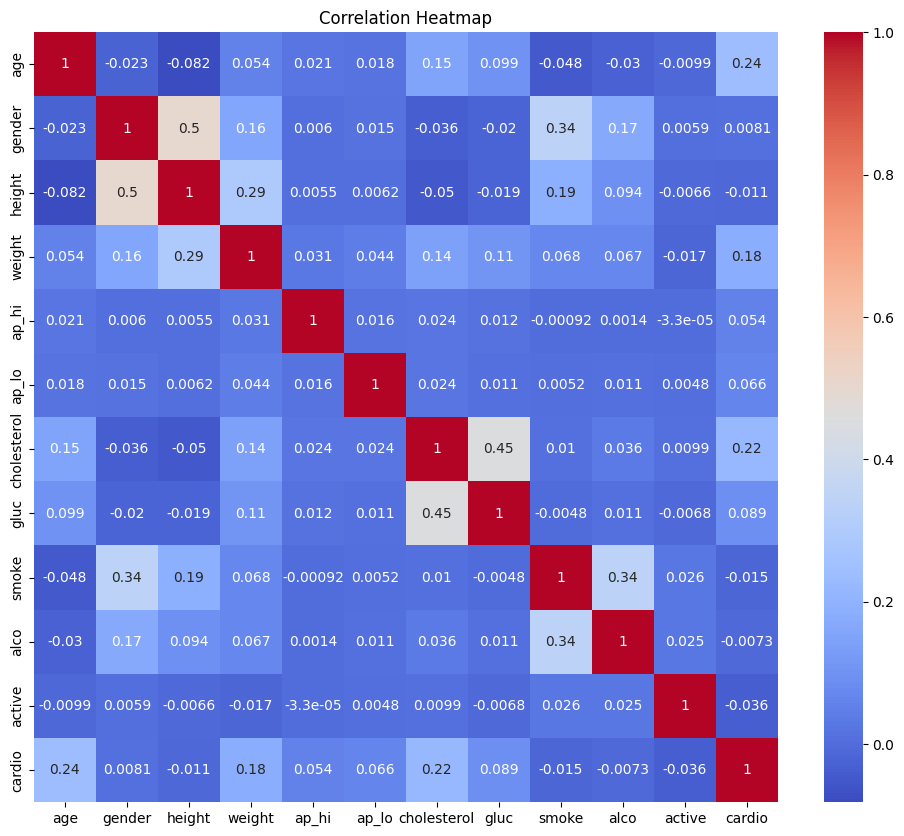

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

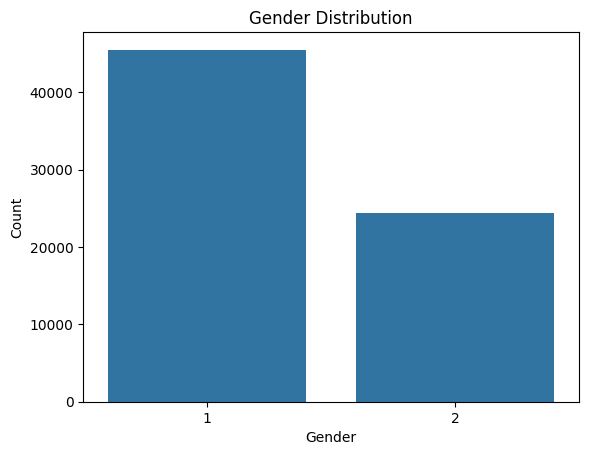

In [50]:
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


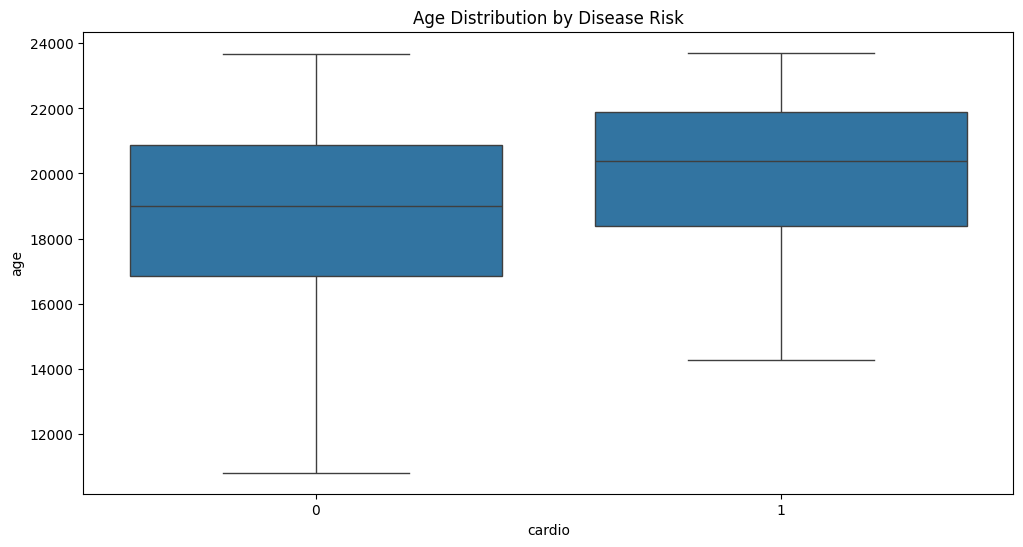

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cardio', y='age', data=df)
plt.title('Age Distribution by Disease Risk')
plt.show()

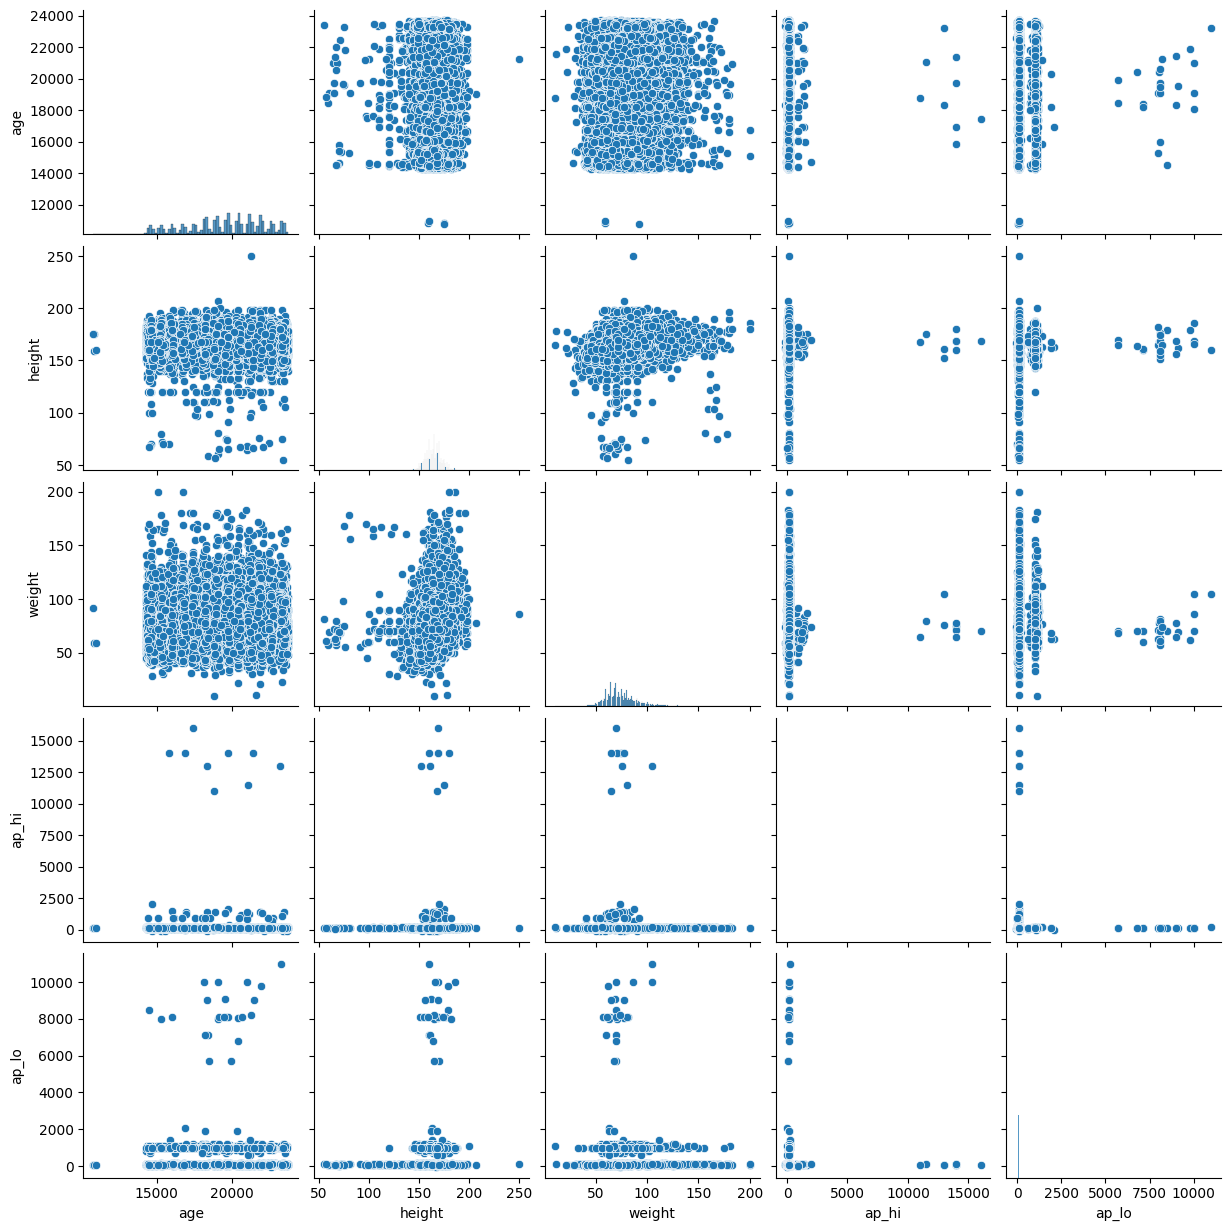

In [60]:
sns.pairplot(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
plt.show()

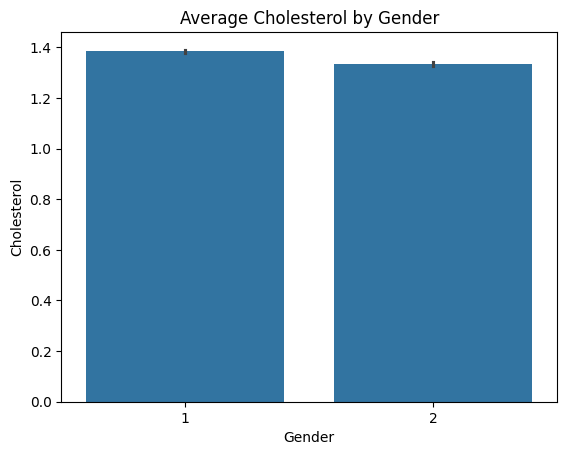

In [42]:
sns.barplot(x='gender', y='cholesterol', data=df)
plt.xlabel('Gender')
plt.ylabel('Cholesterol')
plt.title('Average Cholesterol by Gender')
plt.show()

# Feature Engineering

In [27]:
X = df.drop('cardio', axis=1)
y = df['cardio']

# Data Preparation

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [30]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [31]:
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000




Confusion Matrix:


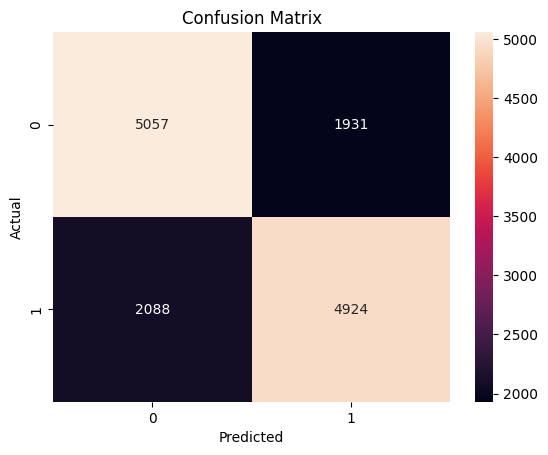

In [32]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance

In [33]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

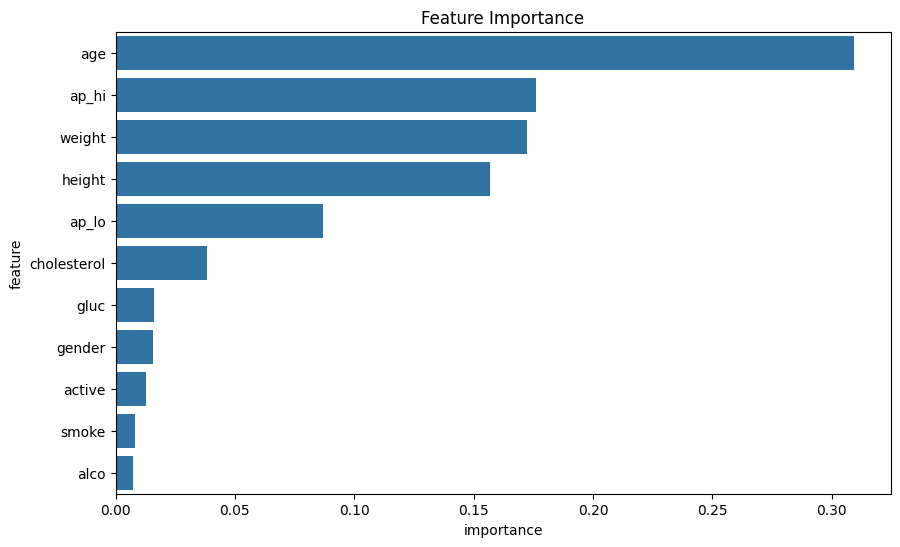

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [35]:
print("\nTop 5 Important Features:")
print(feature_importance.head())


Top 5 Important Features:
  feature  importance
0     age    0.309179
4   ap_hi    0.175971
3  weight    0.172267
2  height    0.157043
5   ap_lo    0.087078


In [65]:
# Predict on new data
new_patient = np.array([[20228, 1, 156, 85.0, 140, 90, 3, 1, 0, 0, 1]])
new_patient_scaled = scaler.transform(new_patient)
risk_prediction = model.predict(new_patient_scaled)
risk_probability = model.predict_proba(new_patient_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [66]:
print("\nNew Patient Risk Prediction:")
print(f"Predicted Risk: {'High' if risk_prediction[0] == 1 else 'Low'}")
print(f"Risk Probability: {risk_probability[0][1]:.2f}")


New Patient Risk Prediction:
Predicted Risk: High
Risk Probability: 0.92
